In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import svd

## Grayscale Image Compression

!["A Kitten"](kitten.jpeg)

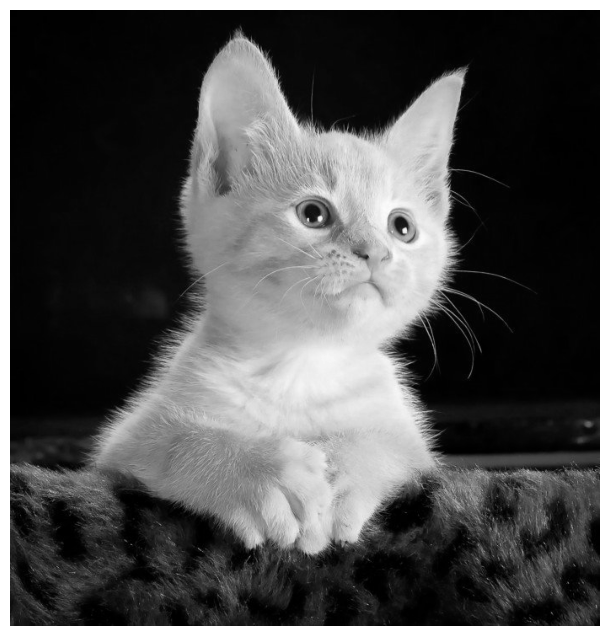

In [2]:
plt.rcParams['figure.figsize']=[16,8]

kitten_image_matrix = imread("kitten.jpeg")
kitten_image_grayscale_matrix = np.mean(kitten_image_matrix,-1)
kitten_image_grayscale = plt.imshow(kitten_image_grayscale_matrix)
plt.set_cmap('gray')
plt.axis('off');

In [3]:
def U_V(M,opc):
    if opc == 1:
        newM = np.dot(M.T, M)
    if opc == 2:
        newM = np.dot(M, M.T)
    
    eigenvalues, eigenvectors = np.linalg.eig(newM)
    ncols = np.argsort(eigenvalues)[::-1]

    if opc == 1 :
        return eigenvectors[:,ncols].T
    else:
        return eigenvectors[:,ncols]

In [4]:
def Sigma(M):
    if (np.size(np.dot(M,M.T)) > np.size(np.dot(M.T,M))):
        newM = np.dot(M.T,M)
    else:
        newM = np.dot(M,M.T)

    eigenvalues, eigenvectors = np.linalg.eig(newM)
    singularvalues = np.sqrt(eigenvalues)
    # Sorting in descending order as the svd function does
    return singularvalues[::-1]

In [5]:
kitten_image_grayscale_matrix.shape

(731, 700)

In [6]:
VT = U_V(kitten_image_grayscale_matrix,1)
U  = U_V(kitten_image_grayscale_matrix,2)
Sigma = Sigma(kitten_image_grayscale_matrix)

In [7]:
U_svd, Sigma_svd, VT_svd = np.linalg.svd(kitten_image_grayscale_matrix)
print(VT_svd,"\n")
print(U_svd,"\n")
print(Sigma_svd)

[[-0.0043574  -0.00424715 -0.00428745 ... -0.00463915 -0.00474913
  -0.00473673]
 [ 0.0129527   0.01240805  0.01240565 ...  0.01381207  0.01389829
   0.01368378]
 [ 0.01612996  0.01526286  0.01487    ...  0.0148953   0.01435532
   0.01414179]
 ...
 [-0.07492251 -0.00816854 -0.0199467  ... -0.13291718  0.09326852
  -0.02797039]
 [-0.0121941   0.03682886  0.04959855 ...  0.15750552  0.00503536
  -0.03423165]
 [-0.00834616  0.08659423  0.06499339 ...  0.01026913 -0.05648236
   0.07208424]] 

[[-0.00121499  0.00148077  0.00105641 ... -0.08239931  0.03616438
   0.03461876]
 [-0.00121045  0.00138978  0.00108028 ... -0.00292793 -0.01848578
  -0.0846566 ]
 [-0.00121112  0.00137698  0.00107935 ...  0.18435995  0.02688216
  -0.11197885]
 ...
 [-0.0054337   0.01004453  0.01533023 ...  0.00086679 -0.02548417
  -0.00370536]
 [-0.00517532  0.01013521  0.01553846 ... -0.01426985  0.05489056
   0.00083334]
 [-0.00500346  0.0099658   0.01555383 ...  0.01346125 -0.02583644
  -0.00230915]] 

[6.87545552e

In [8]:
assert (U.all() == U_svd.all())
assert (Sigma.all() == Sigma_svd.all())
assert (VT.all() == VT_svd.all())

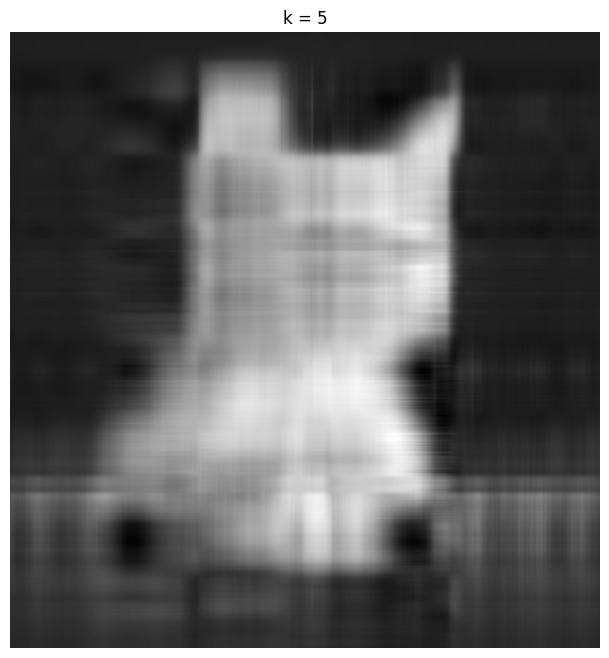

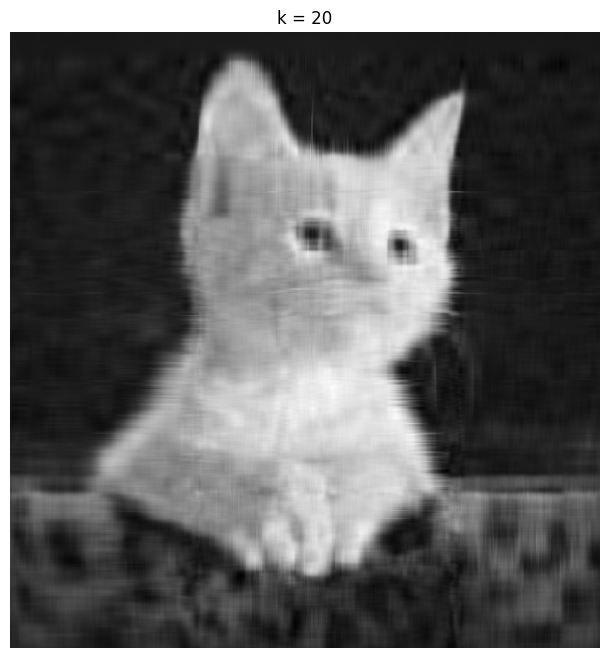

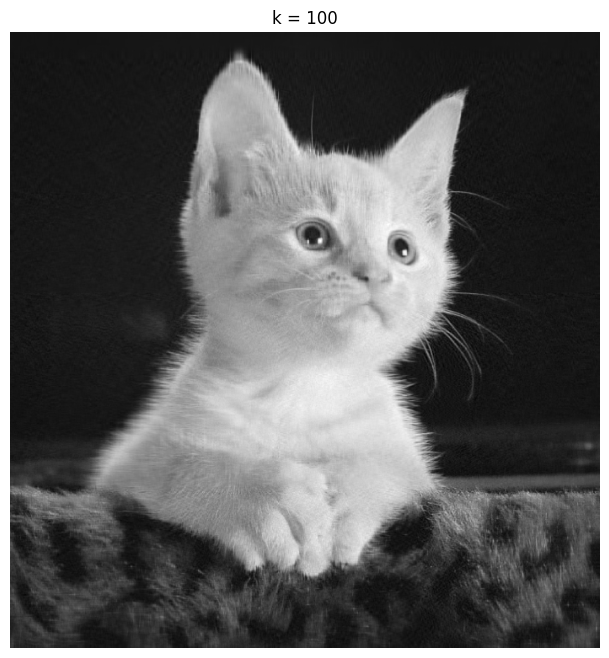

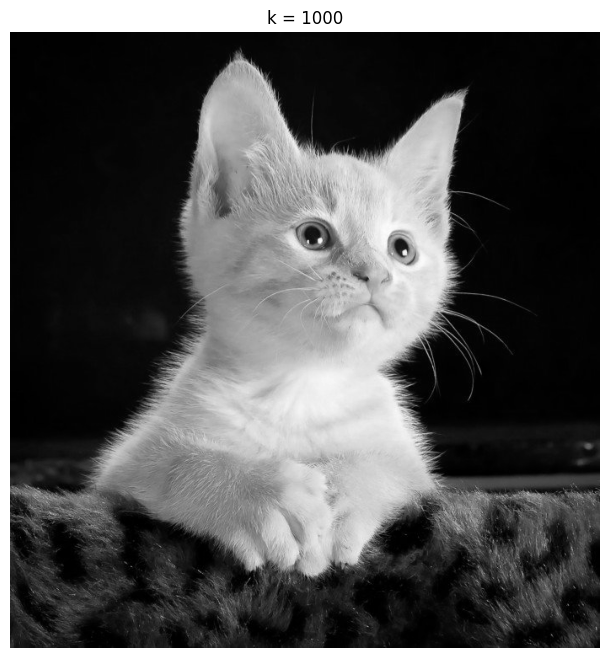

In [9]:
U, S, VT = np.linalg.svd(kitten_image_grayscale_matrix, full_matrices=False)

S=np.diag(S)

i=0
for k in (5,20,100,1000):
    X_Ap = U[:,:k] @ S[0:k,:k] @ VT[:k, :]
    plt.figure(i+1)
    i+=1
    img = plt.imshow(X_Ap)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('k = ' + str(k))
    plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from ipywidgets import interact

def load_image(image_path):
    image = io.imread(image_path)
    grayscale_image = color.rgb2gray(image)
    return grayscale_image

def compress_image(image, k):
    U, S, Vt = np.linalg.svd(image, full_matrices=False)
    S = np.diag(S[:k])
    U = U[:, :k]
    Vt = Vt[:k, :]
    compressed_image = np.dot(U, np.dot(S, Vt))
    return compressed_image

def display_compressed_image(image_path, k):
    image = load_image(image_path)
    compressed_image = compress_image(image, k)
    
    plt.figure(figsize=(10, 10))
    
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    
    plt.subplot(1, 2, 2)
    plt.title('Compressed Image')
    plt.imshow(compressed_image, cmap='gray')
    
    plt.show()

image_path = 'kitten.jpeg'
interact(display_compressed_image, image_path=image_path, k=(1, 250));


interactive(children=(Text(value='kitten.jpeg', description='image_path'), IntSlider(value=125, description='k…